# Unsupervised classification

## Clustering

A popular unsupervised classification algorithm is clustering. Clustering is the process of finding clusters of items with similar characteristics in a dataset. 

## K-means clustering

K-means clustering is a frequently used clustering algorithm where K stands for the number of clusters you want to identify in your dataset. 

K-means clustering starts with a random selection of k distinct observations. These observations serve as the initial cluster centres. Then we take the first observations in our dataset and measure the distance to each of the cluster centres and assign the observation to cluster that is closest by. This process is repeated until all observations in the dataset are assigned to a cluster. Then we calculate the mean for each cluster and repeat the step of assigning observations to a cluster. If the clustering doesn’t change, we are finished.  


In [ ]:
# From: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# Nice plots: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
# See: https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489
# Explanation elbow plot: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

# Import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# List of named colors for Mathplotlib
COLORS = ["blue","orange","green","purple","brown","pink","olive","cyan","gold","orchid"]
MAX_NR_OF_CLUSTERS = 10

# File with input data
INPUT_FILE = 'data_files/landuse_samples_training.csv' 

# Function to plot the clusters in different colors with cluster centre
def plot_clusters(df_in,  nr_of_clusters_in):

    # Define the colormap to plot
    color_list = []
    for i in df.cluster.unique():
        color_list.append(COLORS[i])
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
  
    # Get coliumns to plot
    X = df_in[[df_in.columns[0], df_in.columns[1]]].to_numpy()

    # Set title and labels
    plt.title('After clustering')
    plt.xlabel(df_in.columns[0])
    plt.ylabel(df_in.columns[1])

    # Plot ploints
    plt.scatter(X[:, 0], X[:, 1], c=df_in['cluster'], cmap=cmap)

    # Set grid
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # Plot the cluster centre
    plot_centre = False
    if plot_centre :
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

    # Draw enclosure 
    for i in df.cluster.unique():

        # Get points from cluster
        points = df[df.cluster == i][[df_in.columns[0], df_in.columns[1]]].values

        # Get convex hull
        hull = ConvexHull(points)
        
        # Get x and y coordinates and repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])

        # Plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=color_list[i])

    # Plot graph
    plt.show()

# Import data
df = pd.read_csv(INPUT_FILE)
X = df[[df.columns[0], df.columns[1]]].to_numpy()

# Ask for number of clusters to plot
ask_for_input = True
while ask_for_input:
    nr_of_clusters = int(input("Give number of clusters to plot between 1 and 8"))
    if nr_of_clusters > 0 and nr_of_clusters < 9 :
        ask_for_input = False

# Categorize clusters
kmeans = KMeans(n_clusters=nr_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)
plot_clusters(df, nr_of_clusters)



## Elbow plot

An important question in K-means clustering is the determination of the value for K (the number of clusters in your dataset). If you cannot decide on the number of clusters based on your domain knowledge, you have to find the optimal number of clusters from your dataset by running the clustering with an increasing number of clusters. You will notice that the within cluster variability (the sum of the square distance between points in a cluster and the cluster centroid) reduces when the number of clusters increases.

To find the optimal number of clusters, you plot the within cluster variability as a function of the number of clusters in a so-called elbow plot. At a certain number of clusters adding more clusters does not yield a strong reduction in within cluster variability. This is the optimal number of clusters.

In [ ]:
# Use elbow method to find optimal number of clusters
within_cluster_sum_of_squared_distance = []
for i in range(1, MAX_NR_OF_CLUSTERS + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    within_cluster_sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), within_cluster_sum_of_squared_distance, color='red')

# Set labels and title
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Witin cluster sum of square distances')
plt.ticklabel_format(style='plain')

# Set grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Show plot
plt.show()

Another way to find the optimal number of clusters is to use the [silhouette score](https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d)

c:\Software\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Software\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Software\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Software\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Software\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:8

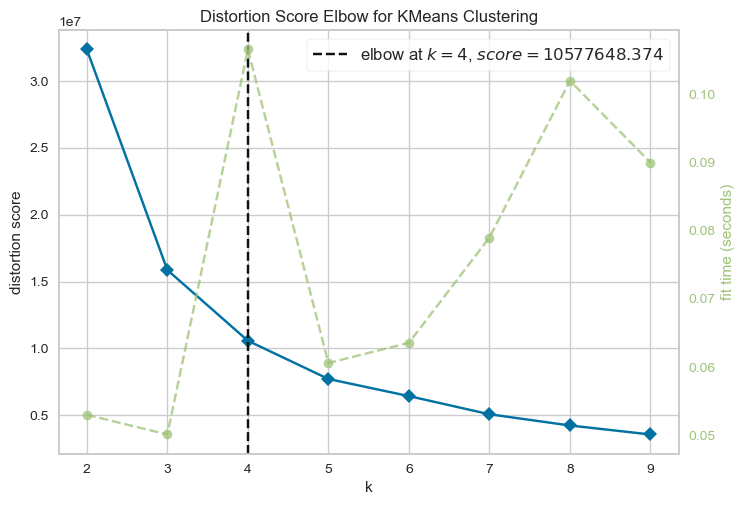

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

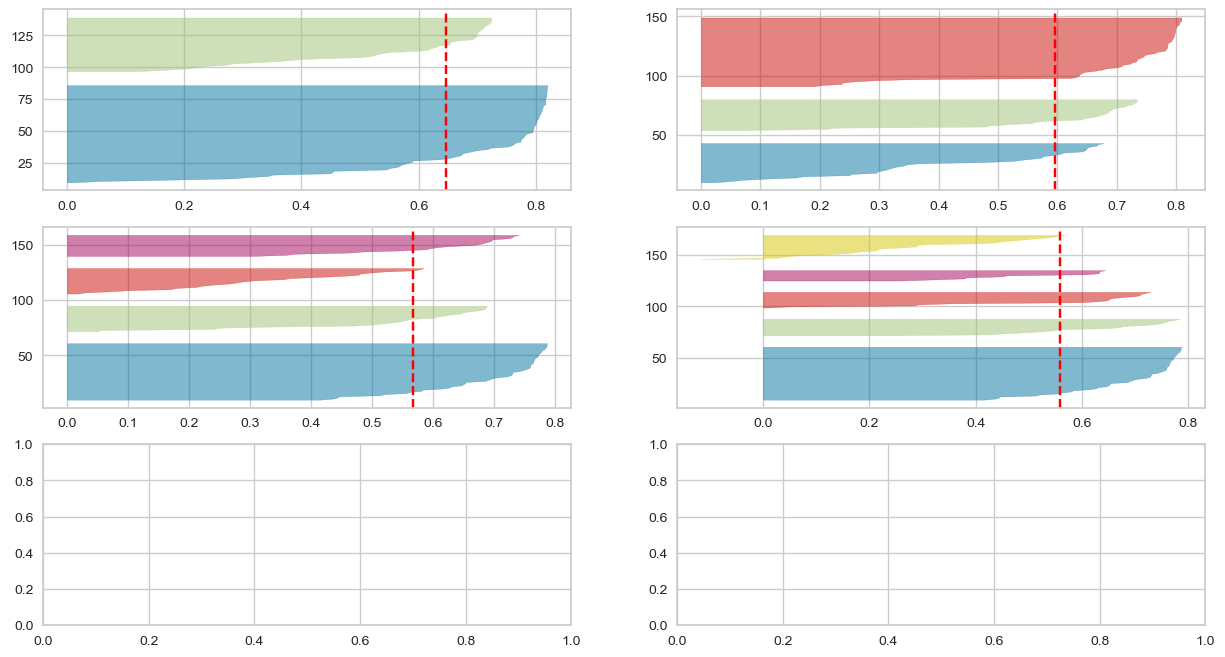

In [7]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 